<a href="https://colab.research.google.com/github/yakupcelk/Data-Science-Projects/blob/main/U%C3%A7a%C4%9F%C4%B1n%20birim%20zamanda%20ne%20kadar%20yak%C4%B1t%20harcad%C4%B1%C4%9F%C4%B1n%C4%B1%20hesaplayan%20bir%20regresyon%20modeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install livelossplot

In [70]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras import layers,regularizers
from sklearn.model_selection import train_test_split
import seaborn as sns
from livelossplot import PlotLossesKerasTF
from sklearn.metrics import  mean_absolute_error
from tensorflow.keras import layers

In [ ]:
from google.colab import files 

uploaded = files.upload()

Saving DataSet2_Q to DataSet2_Q
Saving DataSet1_Q to DataSet1_Q


In [4]:
# Dosyayı pandas.read komutuyla okuttuk.
tr=pd.read_pickle("DataSet1_Q")
tr2=pd.read_pickle("DataSet2_Q")



In [5]:
tr["Thrust (N)"]=round(tr["Thrust (N)"],3)
tr2["Thrust (N)"]=round(tr2["Thrust (N)"],3)

In [6]:
# Hedef değişkenimiz ["FF1 (lb/hr)"],["FF2 (lb/hr)"] featurelerinin toplamı olduğu için her datasete toplamlarını ekliyoruz.



tr["FF1+FF2"]=tr["FF1 (lb/hr)"]+tr["FF2 (lb/hr)"]
tr2["FF1+FF2"]=tr2["FF1 (lb/hr)"]+tr2["FF2 (lb/hr)"]

In [7]:
# 0 rowu 2 data'da da boş olduğu için kaldırıyoruz.
tr.drop(0,axis=0,inplace=True)
tr2.drop(0,axis=0,inplace=True)

In [8]:
tr

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N),FF1+FF2
1,139.0,263.0,130.13,121.0,0.1995,20.50,337140.125583,238.0,37264.0,36208.0,...,1006.00,4.0,0.0,0.0,68.515987,1.874518,0.000000,492526.970794,1124502.077,73472.0
2,139.0,263.0,132.88,125.0,0.2050,20.38,337130.850423,238.0,37184.0,36192.0,...,1006.00,4.0,0.5,0.0,70.390504,2.139048,0.002165,468451.878186,1196748.893,73376.0
3,140.0,263.0,137.13,129.0,0.2120,20.38,337121.585343,238.0,37168.0,36128.0,...,1006.00,4.0,0.5,0.0,72.794083,2.309424,0.002094,441259.461999,1226737.572,73296.0
4,140.0,263.0,143.00,133.0,0.2185,20.25,337112.316232,238.0,37184.0,36144.0,...,1006.00,4.0,0.0,0.0,75.009352,1.794219,0.000000,419061.141494,1023914.582,73328.0
5,140.0,263.0,146.63,137.0,0.2225,20.25,337103.039056,238.0,37216.0,36176.0,...,1006.00,4.0,0.0,0.0,76.382521,1.888107,0.000000,406718.939987,1043205.639,73392.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348539,81.0,55.0,146.63,142.0,0.2190,21.13,237908.167479,237.0,5776.0,5776.0,...,1020.75,-1.5,-10.0,0.5,75.293718,-0.749189,-0.040481,346358.712722,73673.880,11552.0
348540,73.0,56.0,146.00,140.0,0.2180,21.38,237906.790959,237.0,5312.0,5376.0,...,1020.50,-2.0,-6.0,1.5,74.981756,-1.117373,-0.024390,345646.075969,22912.178,10688.0
348541,69.0,58.0,143.38,138.0,0.2125,21.13,237905.497094,237.0,4992.0,5040.0,...,1020.25,-3.5,-4.0,2.0,73.058973,-2.688120,-0.016688,342660.301901,-335792.036,10032.0
348542,65.0,60.0,137.13,133.0,0.2025,21.00,237904.281851,237.0,4704.0,4704.0,...,1020.00,-5.0,-4.0,0.5,69.605516,-2.234745,-0.017516,342138.307954,-230382.363,9408.0


In [11]:
# Modeli kurmak için x ve y değişkenlerimizi oluşturuyoruz
x=tr.drop(columns=["FF1 (lb/hr)","FF2 (lb/hr)","FF1+FF2"])
y=tr["FF1+FF2"].values.reshape(-1,1)

# Datayı train validation ve test olarak 3 bölgeye ayırıyoruz.
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=0)

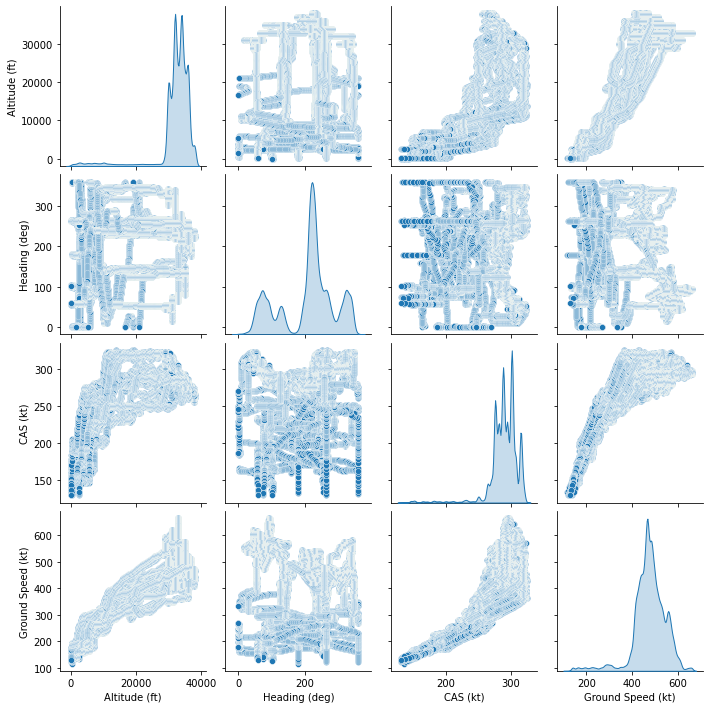

In [16]:
#Bazı featurelerin birbiri arasındaki ilişkileri görmek için scatterplot ile grafik çizimi yapıyoruz.
sns.pairplot(tr[["Altitude (ft)","Heading (deg)","CAS (kt)","Ground Speed (kt)"]],kind="scatter",diag_kind="kde",markers="o")

In [17]:
# Oluşturduğumuz yeni featurenin diğer featureler ile olan korelasyon ilişkisini inceliyoruz.
tr.corrwith(tr["FF1+FF2"])

Altitude (ft)              -0.237398
Heading (deg)               0.113908
CAS (kt)                    0.312339
Ground Speed (kt)          -0.010297
Mach                       -0.038868
Temp (C)                    0.184224
Mass (kg)                   0.601196
Apu Fuel (lb/hr)            0.133182
FF1 (lb/hr)                 0.999890
FF2 (lb/hr)                 0.999887
Throttle 1                  0.811629
Throttle 2                  0.814281
Course (deg)                0.139601
Wind Direction (deg)       -0.037847
Wind Speed (kt)            -0.019504
Flap (deg)                  0.042315
Landing Gear                0.012821
Speed Break                -0.195382
Zero Fuel Weight (lbs)      0.114675
Fuel Onboard (kg)           0.612192
Air Pressure (mb)           0.211531
Ground Speed Dot (kt/s2)    0.403425
Altitude Dot (ft/s)         0.812647
Heading Dot (deg/s)        -0.002135
True Airspeed (m/s)        -0.001303
True Airspeed Dot (m/s2)    0.239945
Gamma (rad)                 0.806011
D

In [18]:
#Data ile ilgili bilgi almak için describe komutuyla ortalama ve standart sapmasını inceliyoruz.
#İncelemeler sonunda ortalama ve standart sapma birbirlerinde çok uzak değerler olduğunu görüyoruz.
#Bu sebeple değerlerimizi normalize ediyoruz.
tr.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Altitude (ft),348543.0,31806.706739,6109.404786,-38.000000,31003.000000,33000.000000,34998.000000,3.801100e+04
Heading (deg),348543.0,207.537638,81.259090,0.000000,142.000000,221.000000,255.000000,3.600000e+02
CAS (kt),348543.0,289.108251,22.187096,130.130000,280.630000,290.000000,301.880000,3.253800e+02
Ground Speed (kt),348543.0,474.855237,72.237145,116.000000,442.000000,476.000000,517.000000,6.640000e+02
Mach,348543.0,0.804393,0.098076,0.193000,0.827000,0.830500,0.833000,8.610000e-01
Temp (C),348543.0,-41.718616,13.777658,-58.630000,-49.380000,-44.250000,-39.630000,3.988000e+01
Mass (kg),348543.0,276603.578165,32937.484124,218089.364901,248015.651623,274638.700993,303868.789045,3.497289e+05
Apu Fuel (lb/hr),348543.0,237.166519,2.989470,227.000000,238.000000,238.000000,238.000000,2.390000e+02
FF1 (lb/hr),348543.0,9044.715401,2868.981341,960.000000,8000.000000,8816.000000,9776.000000,4.072000e+04
FF2 (lb/hr),348543.0,8968.413401,2822.616959,944.000000,7936.000000,8736.000000,9696.000000,3.964800e+04


In [19]:
# Burada eklenen kütüphaneler modelin optimum biçimde eğitilmesi için eklenen kütüphanelerdir. 
# ModelCheckpoint modelimizi kaydetmemizi sağlıyor.
#EarlyStopping model eğitilirken ezberden kaçınmasını sağlar. 
# ReduceLROnPlateau model eğitilirken loss iyileşmeyince öğrenme oranını düşüren fonksiyon.
#kernel_regularizer loss u düşürmek için katman düzenleyici.
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau


reduce_lr = ReduceLROnPlateau(monitor="val_loss", patience=10, factor=0.2, min_lr=0.00001)
early_stop = EarlyStopping(monitor="val_loss", patience=10)
checkpoint = ModelCheckpoint("best_model", monitor="val_loss", verbose=1, save_best_only=True)
#X_train,y_train değişkenlerinin ikiside normalize edilmelidir. Bu sebeple StandardScaler ile normalizasyon yapıyoruz.
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
y_train=scaler.fit_transform(y_train)

#Model kurulurken veriyi parçalayıp daha iyi sonuçlar almak için katmanlara ayırıyoruz.
linear_model=tf.keras.Sequential([
    layers.Dense(256,activation="relu",input_shape=X_train.shape[1:], kernel_regularizer=regularizers.l2(3e-4)),layers.Dropout(.1),
    layers.Dense(128,activation="relu", kernel_regularizer=regularizers.l2(3e-4)),layers.Dropout(.1),
    layers.Dense(32,activation="relu", kernel_regularizer=regularizers.l2(3e-4)),layers.Dropout(.1),
    layers.Dense(1)
])

# Compile komutu ile modelin eğitilmesi için gerekli fonksiyonları ekliyoruz.
linear_model.compile(optimizer=tf.optimizers.SGD(),
              loss=tf.keras.losses.mae,
               metrics=["mae"])
#Değişkenlerimizin boyutlarını kontrol ediyoruz.
#Normalizasyon işlemi gerçekleşmiş mi diye kontrol ediyoruz.
print(X_train.shape,y_train.shape)
print(X_train,y_train)

(209125, 27) (209125, 1)
[[ 0.031613    1.531574    0.54192826 ...  0.02711998  0.50508487
   1.92984884]
 [ 0.03128552  0.69451927  0.6431906  ... -0.01798818  1.10508162
  -0.35344285]
 [ 0.5228327  -0.04405843 -0.3244273  ...  0.07239274 -1.02826785
  -1.44003505]
 ...
 [ 0.19518916 -1.48428495  0.2156385  ... -0.01788629 -0.0866175
  -0.51607646]
 [ 0.35876532  0.04210897 -0.06024511 ...  0.02711998 -0.49554489
  -0.5694402 ]
 [ 0.35958402  0.60835187 -0.03774237 ... -0.01853803 -0.05849605
   0.0771032 ]] [[ 0.21557975]
 [ 0.50247734]
 [-0.58885859]
 ...
 [ 0.08619456]
 [-0.23445569]
 [ 0.07494368]]


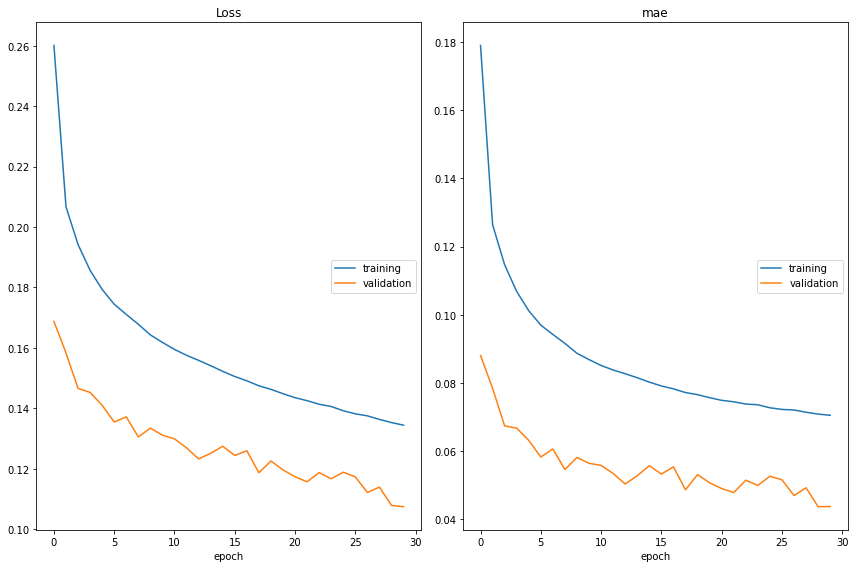

Loss
	training         	 (min:    0.134, max:    0.260, cur:    0.134)
	validation       	 (min:    0.107, max:    0.169, cur:    0.107)
mae
	training         	 (min:    0.071, max:    0.179, cur:    0.071)
	validation       	 (min:    0.044, max:    0.088, cur:    0.044)

Epoch 30: val_loss improved from 0.10787 to 0.10743, saving model to best_model
654/654 [==============================] - 6s 10ms/step - loss: 0.1344 - mae: 0.0705 - val_loss: 0.1074 - val_mae: 0.0438 - lr: 0.0100


In [20]:
#Modelde en optimim sonuç için modeli fit ediyoruz.
hist=linear_model.fit(X_train,y_train,
               epochs=30,
               validation_split=.2,
               callbacks=[PlotLossesKerasTF(),checkpoint,early_stop,reduce_lr],batch_size=256)


In [21]:
# Oluşturduğumuz modeli tr2 data seti ile test ediyoruz.
#Bunun için tr2 datasındaki feature ve hedef featureyi değişkenlere atıyoruz.
xtest_new=tr2.drop(columns=["FF1 (lb/hr)","FF2 (lb/hr)","FF1+FF2"]).values
ytest_new=tr2["FF1+FF2"].values.reshape(-1,1)
# StandardScaler komutu ile normalizasyon işlemini gerçekleştiriyoruz.
xtest_new=scaler.fit_transform(xtest_new)
ytest_new=scaler.fit_transform(ytest_new)
#Evaluate komutuyla modelimizi tr2 data setinde test ediyoruz.
linear_model.evaluate(xtest_new,ytest_new)

11731/11731 [==============================] - 21s 2ms/step - loss: 0.1499 - mae: 0.0863


[0.14994452893733978, 0.0863010436296463]

In [23]:
#Modelimizin ilk 3 tahminini alıp gerçek değerler ile karşılaştırıyoruz.
x_new=xtest_new[:3]
y_pred=linear_model.predict(x_new)
print("Tahminler:\n",y_pred)
print("Gerçek değerler:\n",ytest_new[:3])

Tahminler:
 [[8.753378]
 [8.772432]
 [8.318237]]
Gerçek değerler:
 [[8.44187532]
 [8.44476741]
 [8.43319904]]


In [24]:
# Uçağın pozisyonunu anlayabilmek için datasetlere kosullar adlı feature ekliyoruz.
tr["kosullar"]=np.gradient(tr["Altitude (ft)"].values)
tr2["kosullar"]=np.gradient(tr2["Altitude (ft)"].values)

In [25]:
tr2

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N),FF1+FF2,kosullar
1,140.0,263.0,131.63,125.0,0.2025,18.25,325554.611609,238.0,31984.0,32544.0,...,3.0,0.0,0.0,69.279215,2.551095,0.000000,485283.286925,1315803.906,64528.0,0.0
2,140.0,263.0,136.63,128.0,0.2100,18.13,325546.449257,238.0,31968.0,32576.0,...,3.5,0.0,0.0,71.830310,2.301695,0.000000,460186.379745,1209494.882,64544.0,0.0
3,140.0,263.0,140.88,132.0,0.2160,18.13,325538.294968,238.0,31952.0,32528.0,...,4.0,0.0,0.0,73.882604,1.033760,0.000000,442943.004492,779471.427,64480.0,0.0
4,140.0,263.0,142.38,136.0,0.2160,18.25,325530.138664,238.0,31984.0,32512.0,...,3.5,0.0,0.0,73.897830,1.539221,0.000000,442924.664781,943987.466,64496.0,0.0
5,140.0,263.0,147.50,139.0,0.2250,18.13,325521.992440,238.0,32000.0,32416.0,...,3.5,0.5,0.0,76.961046,2.643268,0.001980,421236.636058,1287999.896,64416.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375374,2454.0,74.0,135.38,150.0,0.2130,22.50,208627.567788,241.0,5584.0,5312.0,...,-1.0,-5.5,0.0,73.401225,-0.516910,-0.022839,302981.771326,148413.215,10896.0,-5.5
375375,2449.0,74.0,134.25,148.0,0.2120,22.50,208626.269387,241.0,5152.0,4912.0,...,-1.5,-5.0,0.0,73.056619,-0.415419,-0.020861,302395.167373,173048.763,10064.0,-5.0
375376,2444.0,74.0,134.00,147.0,0.2105,22.75,208625.057671,241.0,4800.0,4576.0,...,-1.5,-3.5,0.0,72.570387,-0.674056,-0.014700,301608.387444,130908.017,9376.0,-3.5
375377,2442.0,74.0,132.75,145.0,0.2080,22.75,208623.942722,241.0,4352.0,4256.0,...,-2.5,-1.0,0.0,71.708506,-1.236298,-0.004251,300558.211231,33940.600,8608.0,-1.0


In [26]:
#Tirmanma featuresini True/False olarak datasetlere ekliyoruz.
tr["tirmanma"]=tr["kosullar"]>3
tr2["tirmanma"]=tr2["kosullar"]>3
tr2

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N),FF1+FF2,kosullar,tirmanma
1,140.0,263.0,131.63,125.0,0.2025,18.25,325554.611609,238.0,31984.0,32544.0,...,0.0,0.0,69.279215,2.551095,0.000000,485283.286925,1315803.906,64528.0,0.0,False
2,140.0,263.0,136.63,128.0,0.2100,18.13,325546.449257,238.0,31968.0,32576.0,...,0.0,0.0,71.830310,2.301695,0.000000,460186.379745,1209494.882,64544.0,0.0,False
3,140.0,263.0,140.88,132.0,0.2160,18.13,325538.294968,238.0,31952.0,32528.0,...,0.0,0.0,73.882604,1.033760,0.000000,442943.004492,779471.427,64480.0,0.0,False
4,140.0,263.0,142.38,136.0,0.2160,18.25,325530.138664,238.0,31984.0,32512.0,...,0.0,0.0,73.897830,1.539221,0.000000,442924.664781,943987.466,64496.0,0.0,False
5,140.0,263.0,147.50,139.0,0.2250,18.13,325521.992440,238.0,32000.0,32416.0,...,0.5,0.0,76.961046,2.643268,0.001980,421236.636058,1287999.896,64416.0,0.5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375374,2454.0,74.0,135.38,150.0,0.2130,22.50,208627.567788,241.0,5584.0,5312.0,...,-5.5,0.0,73.401225,-0.516910,-0.022839,302981.771326,148413.215,10896.0,-5.5,False
375375,2449.0,74.0,134.25,148.0,0.2120,22.50,208626.269387,241.0,5152.0,4912.0,...,-5.0,0.0,73.056619,-0.415419,-0.020861,302395.167373,173048.763,10064.0,-5.0,False
375376,2444.0,74.0,134.00,147.0,0.2105,22.75,208625.057671,241.0,4800.0,4576.0,...,-3.5,0.0,72.570387,-0.674056,-0.014700,301608.387444,130908.017,9376.0,-3.5,False
375377,2442.0,74.0,132.75,145.0,0.2080,22.75,208623.942722,241.0,4352.0,4256.0,...,-1.0,0.0,71.708506,-1.236298,-0.004251,300558.211231,33940.600,8608.0,-1.0,False


In [27]:
# Aynı işlemleri alçalma için yapıyoruz.
tr["alcalma"]=tr["kosullar"]<-3
tr2["alcalma"]=tr2["kosullar"]<-3
tr2

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N),FF1+FF2,kosullar,tirmanma,alcalma
1,140.0,263.0,131.63,125.0,0.2025,18.25,325554.611609,238.0,31984.0,32544.0,...,0.0,69.279215,2.551095,0.000000,485283.286925,1315803.906,64528.0,0.0,False,False
2,140.0,263.0,136.63,128.0,0.2100,18.13,325546.449257,238.0,31968.0,32576.0,...,0.0,71.830310,2.301695,0.000000,460186.379745,1209494.882,64544.0,0.0,False,False
3,140.0,263.0,140.88,132.0,0.2160,18.13,325538.294968,238.0,31952.0,32528.0,...,0.0,73.882604,1.033760,0.000000,442943.004492,779471.427,64480.0,0.0,False,False
4,140.0,263.0,142.38,136.0,0.2160,18.25,325530.138664,238.0,31984.0,32512.0,...,0.0,73.897830,1.539221,0.000000,442924.664781,943987.466,64496.0,0.0,False,False
5,140.0,263.0,147.50,139.0,0.2250,18.13,325521.992440,238.0,32000.0,32416.0,...,0.0,76.961046,2.643268,0.001980,421236.636058,1287999.896,64416.0,0.5,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375374,2454.0,74.0,135.38,150.0,0.2130,22.50,208627.567788,241.0,5584.0,5312.0,...,0.0,73.401225,-0.516910,-0.022839,302981.771326,148413.215,10896.0,-5.5,False,True
375375,2449.0,74.0,134.25,148.0,0.2120,22.50,208626.269387,241.0,5152.0,4912.0,...,0.0,73.056619,-0.415419,-0.020861,302395.167373,173048.763,10064.0,-5.0,False,True
375376,2444.0,74.0,134.00,147.0,0.2105,22.75,208625.057671,241.0,4800.0,4576.0,...,0.0,72.570387,-0.674056,-0.014700,301608.387444,130908.017,9376.0,-3.5,False,True
375377,2442.0,74.0,132.75,145.0,0.2080,22.75,208623.942722,241.0,4352.0,4256.0,...,0.0,71.708506,-1.236298,-0.004251,300558.211231,33940.600,8608.0,-1.0,False,False


In [28]:
# Seyir içinde aynı işlemleri yapıyoruz.
tr["seyir"]=np.abs(tr["kosullar"])<1
tr2["seyir"]=np.abs(tr2["kosullar"])<1
tr2

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N),FF1+FF2,kosullar,tirmanma,alcalma,seyir
1,140.0,263.0,131.63,125.0,0.2025,18.25,325554.611609,238.0,31984.0,32544.0,...,69.279215,2.551095,0.000000,485283.286925,1315803.906,64528.0,0.0,False,False,True
2,140.0,263.0,136.63,128.0,0.2100,18.13,325546.449257,238.0,31968.0,32576.0,...,71.830310,2.301695,0.000000,460186.379745,1209494.882,64544.0,0.0,False,False,True
3,140.0,263.0,140.88,132.0,0.2160,18.13,325538.294968,238.0,31952.0,32528.0,...,73.882604,1.033760,0.000000,442943.004492,779471.427,64480.0,0.0,False,False,True
4,140.0,263.0,142.38,136.0,0.2160,18.25,325530.138664,238.0,31984.0,32512.0,...,73.897830,1.539221,0.000000,442924.664781,943987.466,64496.0,0.0,False,False,True
5,140.0,263.0,147.50,139.0,0.2250,18.13,325521.992440,238.0,32000.0,32416.0,...,76.961046,2.643268,0.001980,421236.636058,1287999.896,64416.0,0.5,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375374,2454.0,74.0,135.38,150.0,0.2130,22.50,208627.567788,241.0,5584.0,5312.0,...,73.401225,-0.516910,-0.022839,302981.771326,148413.215,10896.0,-5.5,False,True,False
375375,2449.0,74.0,134.25,148.0,0.2120,22.50,208626.269387,241.0,5152.0,4912.0,...,73.056619,-0.415419,-0.020861,302395.167373,173048.763,10064.0,-5.0,False,True,False
375376,2444.0,74.0,134.00,147.0,0.2105,22.75,208625.057671,241.0,4800.0,4576.0,...,72.570387,-0.674056,-0.014700,301608.387444,130908.017,9376.0,-3.5,False,True,False
375377,2442.0,74.0,132.75,145.0,0.2080,22.75,208623.942722,241.0,4352.0,4256.0,...,71.708506,-1.236298,-0.004251,300558.211231,33940.600,8608.0,-1.0,False,False,False


In [29]:
# Data setteki sadece tirmanma pozisyonundaki uçaklarn verilerini çekiyoruz. Değişkene aktarıyoruz.
a=tr[tr["tirmanma"]==1]
x1=a.drop(columns=["FF1 (lb/hr)","FF2 (lb/hr)","tirmanma","alcalma","seyir"])
b=tr2[tr2["tirmanma"]==1]
x2=b.drop(columns=["FF1 (lb/hr)","FF2 (lb/hr)","tirmanma","alcalma","seyir"])

In [30]:
x1

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),Throttle 1,Throttle 2,...,Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N),FF1+FF2,kosullar
15,151.0,263.0,178.25,174.0,0.2740,20.25,337010.202791,238.0,79.800,79.720,...,3.5,3.5,0.0,94.062071,2.134424,0.011341,314214.526463,1071020.029,73648.0,3.5
16,155.0,263.0,184.50,177.0,0.2815,20.00,337000.899408,238.0,79.800,79.720,...,3.0,5.0,0.0,96.595562,2.028774,0.015777,308357.099187,1044196.831,73600.0,5.0
17,161.0,263.0,187.13,180.0,0.2860,19.88,336991.585945,238.0,79.800,79.720,...,3.0,7.5,0.0,98.119620,1.877024,0.023298,305541.847415,1015077.854,73680.0,7.5
18,170.0,263.0,192.50,183.0,0.2925,19.88,336982.254339,238.0,79.800,79.720,...,2.5,10.5,0.0,100.349611,1.532608,0.031893,302328.930931,924184.810,73824.0,10.5
19,182.0,263.0,194.38,185.0,0.2950,19.75,336972.912653,238.0,79.800,79.720,...,2.0,12.5,0.0,101.184836,0.653145,0.037654,301357.368097,645879.726,73904.0,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335300,34998.0,125.0,284.50,575.0,0.8380,-52.50,262420.569608,237.0,59.590,59.660,...,0.0,5.0,0.0,249.455613,0.033955,0.006109,130696.948456,155329.572,19072.0,5.0
335301,35002.0,125.0,284.50,575.0,0.8385,-52.38,262418.205270,237.0,59.175,59.240,...,0.0,4.0,0.0,249.672363,0.148840,0.004883,130833.400287,182458.329,18528.0,4.0
335302,35006.0,125.0,284.50,575.0,0.8390,-52.50,262415.911491,237.0,58.775,58.865,...,0.0,4.0,0.0,249.753293,0.040465,0.004882,130975.277184,154156.331,17968.0,4.0
347433,14380.0,58.0,250.00,311.0,0.4910,-3.00,239163.145423,237.0,33.530,34.080,...,0.0,110.0,0.0,161.736611,-0.227581,0.207300,112750.623900,544520.787,3904.0,110.0


In [31]:
#Model kurulumuna geçiyoruz.
x=x1.drop(columns="FF1+FF2")
y=x1["FF1+FF2"].values.reshape(-1,1)

# Datayı train validation ve test olarak 3 bölgeye ayırıyoruz.
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=42)

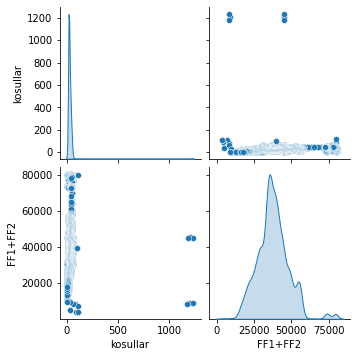

In [32]:
#Featurelerin birbiri arasındaki ilişkileri görmek için scatterplot ile grafik çizimi yapıyoruz.
sns.pairplot(x1[["kosullar","FF1+FF2"]],kind="scatter",diag_kind="kde",markers="o");

In [34]:
# FF1+FF2 feature ile tirmanma feature arası korelasyon ilişkisi.
x1.corrwith(x1["FF1+FF2"])

Altitude (ft)              -0.818001
Heading (deg)              -0.000654
CAS (kt)                   -0.396498
Ground Speed (kt)          -0.696948
Mach                       -0.759614
Temp (C)                    0.775019
Mass (kg)                   0.460102
Apu Fuel (lb/hr)            0.176597
Throttle 1                  0.641322
Throttle 2                  0.641169
Course (deg)                0.102186
Wind Direction (deg)        0.240331
Wind Speed (kt)            -0.537781
Flap (deg)                  0.512472
Landing Gear                0.155684
Speed Break                -0.079756
Zero Fuel Weight (lbs)      0.157577
Fuel Onboard (kg)           0.492146
Air Pressure (mb)           0.808405
Ground Speed Dot (kt/s2)    0.449506
Altitude Dot (ft/s)         0.458064
Heading Dot (deg/s)        -0.024007
True Airspeed (m/s)        -0.733455
True Airspeed Dot (m/s2)    0.360427
Gamma (rad)                 0.675639
Drag (N)                    0.651608
Thrust (N)                  0.856445
F

In [35]:
#2 feature'nin ortalama ve standart sapmasına bakıyoruz.
# Feature normalizasyon yapılmalıdır.
x1[["kosullar","FF1+FF2"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
kosullar,13983.0,25.815884,26.955751,3.5,17.0,23.0,32.0,1234.0
FF1+FF2,13983.0,37620.876779,10474.984348,3904.0,31264.0,36960.0,43312.0,80304.0


In [36]:
# StandardScaler işlemiyle normalizasyon işlemi yapılıyor.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
y_train=scaler.fit_transform(y_train)

In [37]:
x_train.values,y_train

(array([[2.99140000e+04, 2.66000000e+02, 3.20750000e+02, ...,
         1.62764473e+05, 2.40060966e+05, 2.40000000e+01],
        [4.40900000e+03, 2.40000000e+02, 2.59750000e+02, ...,
         1.63763038e+05, 4.41071976e+05, 3.20000000e+01],
        [3.32290000e+04, 2.19000000e+02, 2.88500000e+02, ...,
         1.40926038e+05, 1.55515426e+05, 1.35000000e+01],
        ...,
        [3.30350000e+04, 9.40000000e+01, 2.95750000e+02, ...,
         1.31631096e+05, 2.18904018e+05, 1.20000000e+01],
        [3.30340000e+04, 1.24000000e+02, 2.93250000e+02, ...,
         1.28458968e+05, 1.77382558e+05, 1.20000000e+01],
        [2.60640000e+04, 5.30000000e+01, 3.21380000e+02, ...,
         1.59609243e+05, 2.81432122e+05, 2.00000000e+01]]),
 array([[-0.38892527],
        [ 1.30112631],
        [-0.90858946],
        ...,
        [-1.1752793 ],
        [-1.19813842],
        [-0.21214801]]))

In [38]:
y_train.shape,X_train.shape

((8389, 1), (8389, 28))

In [39]:
model= tf.keras.Sequential([
           layers.Dense(128,activation="relu",kernel_regularizer=regularizers.l2(3e-4)),layers.Dropout(.1),
           layers.Dense(64,activation="relu",kernel_regularizer=regularizers.l2(3e-4)),layers.Dropout(.1),
           layers.Dense(32,activation="relu",kernel_regularizer=regularizers.l2(3e-4)),layers.Dropout(.1),
           layers.Dense(1)
])


In [40]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.keras.losses.mae,
              metrics=["mae"]
               )


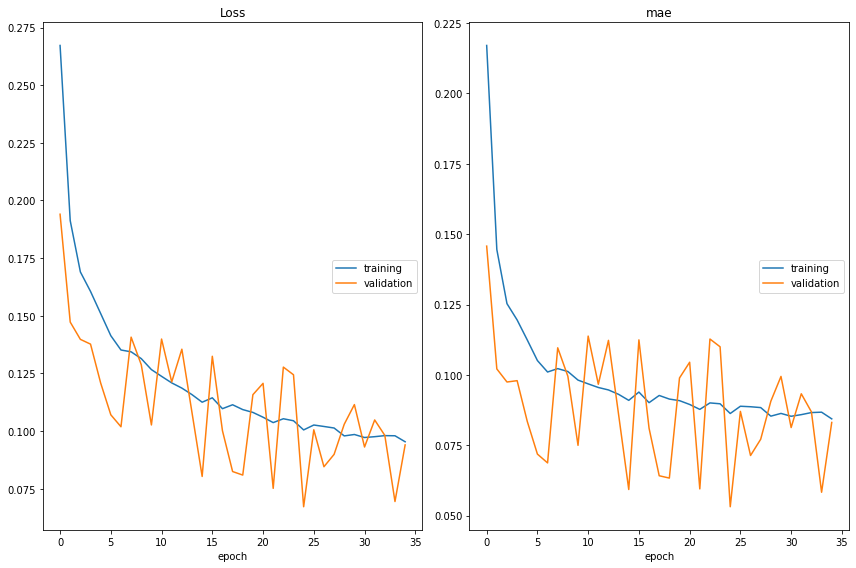

Loss
	training         	 (min:    0.095, max:    0.267, cur:    0.095)
	validation       	 (min:    0.067, max:    0.194, cur:    0.094)
mae
	training         	 (min:    0.084, max:    0.217, cur:    0.084)
	validation       	 (min:    0.053, max:    0.146, cur:    0.083)

Epoch 35: val_loss did not improve from 0.06718
210/210 [==============================] - 1s 5ms/step - loss: 0.0954 - mae: 0.0844 - val_loss: 0.0940 - val_mae: 0.0831 - lr: 0.0010


In [41]:
history=model.fit(x_train, y_train,
                          epochs=100,
                          validation_split=.2,
                          callbacks=[PlotLossesKerasTF(),checkpoint,early_stop,reduce_lr])

In [42]:
# Oluşturduğumuz modeli tr2 data seti ile test ediyoruz.
#Bunun için tr2 datasındaki feature ve hedef featureyi değişkenlere atıyoruz.
xtest_new1=x2.drop(columns="FF1+FF2")
ytest_new1=x2["FF1+FF2"].values.reshape(-1,1)
# StandardScaler komutu ile normalizasyon işlemini gerçekleştiriyoruz.
ytest_new1=scaler.fit_transform(ytest_new1)
xtest_new1=scaler.fit_transform(xtest_new1)
#Evaluate komutuyla modelimizi tr2 data setinde test ediyoruz.
model.evaluate(xtest_new1,ytest_new1)

454/454 [==============================] - 1s 1ms/step - loss: 0.1676 - mae: 0.1567


[0.167624369263649, 0.1567385196685791]

In [45]:
#Modelimizin ilk 3 tahminini alıp gerçek değerler ile karşılaştırıyoruz.
x_new1=xtest_new1[:3]
y_pred1=model.predict(x_new1)
print("Tahminler:\n",y_pred1)
print("Gerçek değerler:\n",ytest_new1[:3])

Tahminler:
 [[2.6632998]
 [2.6763341]
 [2.6736715]]
Gerçek değerler:
 [[2.70203289]
 [2.70041779]
 [2.69234233]]


In [46]:
a=tr[tr["alcalma"]==1]
x1=a.drop(columns=["FF1 (lb/hr)","FF2 (lb/hr)","tirmanma","alcalma","seyir"])
b=tr2[tr2["alcalma"]==1]
x2=b.drop(columns=["FF1 (lb/hr)","FF2 (lb/hr)","tirmanma","alcalma","seyir"])
x2

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),Throttle 1,Throttle 2,...,Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N),FF1+FF2,kosullar
6634,30999.0,57.0,306.13,510.0,0.8290,-43.75,305544.230968,238.0,59.39,59.390,...,0.0,-4.5,0.0,251.625220,0.192077,-0.005451,149646.608960,192001.528,19920.0,-4.5
6635,30993.0,57.0,308.25,510.0,0.8265,-43.88,305541.719340,238.0,59.26,59.260,...,0.0,-6.0,0.0,250.795259,-0.386960,-0.007292,149330.785294,9249.131,19696.0,-6.0
6678,31001.0,57.0,302.50,509.0,0.8180,-43.88,305427.981899,238.0,62.07,62.115,...,0.0,-4.0,0.0,248.215998,1.560410,-0.004912,148677.745115,610558.455,22736.0,-4.0
6707,30992.0,57.0,304.38,511.0,0.8195,-43.88,305349.683445,238.0,60.12,60.160,...,0.0,-4.0,0.0,248.671161,-0.160015,-0.004903,148693.465520,85151.397,20416.0,-4.0
6708,30987.0,57.0,302.00,511.0,0.8165,-43.63,305347.095211,238.0,60.12,60.120,...,0.0,-3.5,0.0,247.895967,0.455164,-0.004303,148577.789539,274674.443,20304.0,-3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375372,2466.0,74.0,137.63,151.0,0.2165,22.63,208630.481096,241.0,33.66,34.060,...,-1.0,-6.5,0.0,74.623758,-0.525172,-0.026549,305447.127899,141561.606,12656.0,-6.5
375373,2460.0,74.0,137.13,150.0,0.2150,22.50,208628.971019,241.0,33.66,34.060,...,-0.5,-6.0,0.0,74.090439,-0.611266,-0.024683,304317.188713,126288.392,11744.0,-6.0
375374,2454.0,74.0,135.38,150.0,0.2130,22.50,208627.567788,241.0,33.66,34.060,...,-1.0,-5.5,0.0,73.401225,-0.516910,-0.022839,302981.771326,148413.215,10896.0,-5.5
375375,2449.0,74.0,134.25,148.0,0.2120,22.50,208626.269387,241.0,33.66,34.060,...,-1.5,-5.0,0.0,73.056619,-0.415419,-0.020861,302395.167373,173048.763,10064.0,-5.0


In [47]:
#Model kurulumuna geçiyoruz.
x=x1.drop(columns="FF1+FF2")
y=x1["FF1+FF2"].values.reshape(-1,1)

# Datayı train validation ve test olarak 3 bölgeye ayırıyoruz.
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=0)

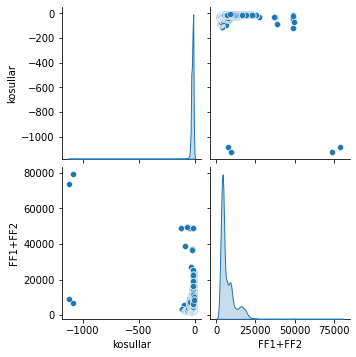

In [48]:
#Featurelerin birbiri arasındaki ilişkileri görmek için scatterplot ile grafik çizimi yapıyoruz.
sns.pairplot(x1[["kosullar","FF1+FF2"]],kind="scatter",diag_kind="kde",markers="o");

In [51]:
# FF1+FF2 feature ile tirmanma feature arası korelasyon ilişkisi.
x1.corrwith(x1["FF1+FF2"])

Altitude (ft)              -0.203648
Heading (deg)              -0.095197
CAS (kt)                   -0.429370
Ground Speed (kt)          -0.284656
Mach                       -0.235630
Temp (C)                    0.151180
Mass (kg)                   0.307014
Apu Fuel (lb/hr)            0.044819
Throttle 1                  0.857929
Throttle 2                  0.860924
Course (deg)               -0.089270
Wind Direction (deg)        0.013945
Wind Speed (kt)            -0.040717
Flap (deg)                  0.626647
Landing Gear                0.630330
Speed Break                -0.068028
Zero Fuel Weight (lbs)      0.064259
Fuel Onboard (kg)           0.329094
Air Pressure (mb)           0.292471
Ground Speed Dot (kt/s2)    0.240190
Altitude Dot (ft/s)         0.502311
Heading Dot (deg/s)         0.000588
True Airspeed (m/s)        -0.272948
True Airspeed Dot (m/s2)    0.206964
Gamma (rad)                 0.186226
Drag (N)                    0.653664
Thrust (N)                  0.729278
F

In [52]:
#2 feature'nin ortalama ve standart sapmasına bakıyoruz.
# FF1+FF2 feature normalizasyon yapılmalıdır.
x1[["kosullar","FF1+FF2"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
kosullar,17422.0,-20.702933,18.875803,-1122.0,-27.0,-18.0,-13.5,-3.5
FF1+FF2,17422.0,6758.209161,4632.622921,1904.0,3728.0,4672.0,8688.0,79312.0


In [71]:
from sklearn.preprocessing import StandardScaler

scaler=MinMaxScaler()
x_train=scaler.fit_transform(X_train)
y_train=scaler.fit_transform(y_train)

In [72]:
x_train,y_train

(array([[0.89406422, 0.57983193, 0.82597403, ..., 0.05980289, 0.47185133,
         0.        ],
        [0.78844529, 0.91036415, 0.97272727, ..., 0.1719708 , 0.46574857,
         0.5       ],
        [0.89406422, 0.64705882, 0.8214026 , ..., 0.061205  , 0.4524295 ,
         0.5       ],
        ...,
        [0.92044254, 0.30252101, 0.79090909, ..., 0.06815064, 0.40232243,
         0.5       ],
        [0.92041614, 0.34173669, 0.78114286, ..., 0.03856767, 0.4087933 ,
         0.5       ],
        [0.94692649, 0.59663866, 0.74935065, ..., 0.03203458, 0.42175505,
         0.5       ]]), array([[0.16546763],
        [0.22619551],
        [0.16081253],
        ...,
        [0.16081253],
        [0.12251375],
        [0.14853999]]))

In [73]:
model= tf.keras.Sequential([
           layers.Dense(128,activation="relu",kernel_regularizer=regularizers.l2(3e-4)),layers.Dropout(.1),
           layers.Dense(128,activation="relu",kernel_regularizer=regularizers.l2(3e-4)),layers.Dropout(.1),
           layers.Dense(64,activation="relu",kernel_regularizer=regularizers.l2(3e-4)),layers.Dropout(.1),
           layers.Dense(1)
])

In [74]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.keras.losses.mae,
              metrics=["mae"]
               )

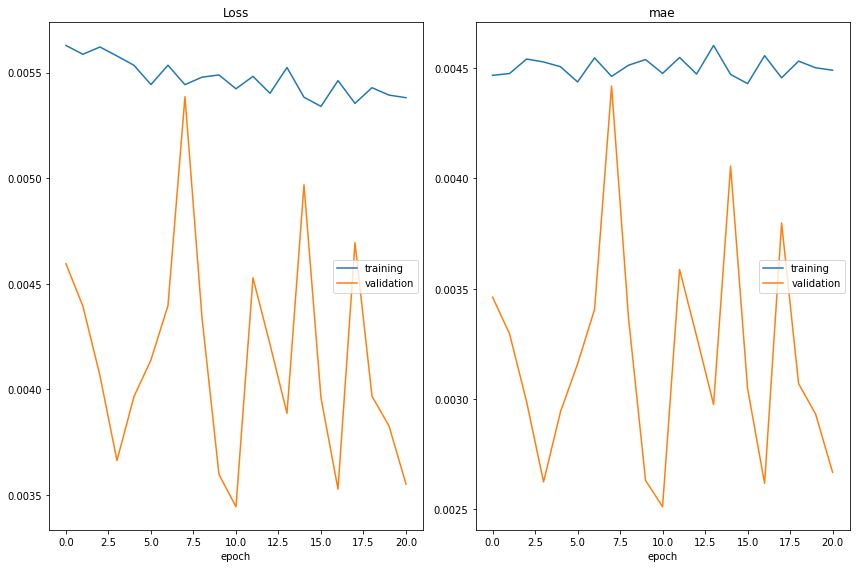

Loss
	training         	 (min:    0.005, max:    0.006, cur:    0.005)
	validation       	 (min:    0.003, max:    0.005, cur:    0.004)
mae
	training         	 (min:    0.004, max:    0.005, cur:    0.004)
	validation       	 (min:    0.003, max:    0.004, cur:    0.003)

Epoch 21: val_loss did not improve from 0.00344
1124/1124 [==============================] - 7s 6ms/step - loss: 0.0054 - mae: 0.0045 - val_loss: 0.0036 - val_mae: 0.0027 - lr: 0.0010


In [76]:
history=model.fit(x_train, y_train,
                          epochs=100,
                          validation_split=.2,
                          callbacks=[PlotLossesKerasTF(),checkpoint,early_stop,reduce_lr],batch_size=128)

In [77]:
# Oluşturduğumuz modeli tr2 data seti ile test ediyoruz.
#Bunun için tr2 datasındaki feature ve hedef featureyi değişkenlere atıyoruz.
xtest_new1=x2.drop(columns="FF1+FF2")
ytest_new1=x2["FF1+FF2"].values.reshape(-1,1)
# StandardScaler komutu ile normalizasyon işlemini gerçekleştiriyoruz.
ytest_new1=scaler.fit_transform(ytest_new1)
xtest_new1=scaler.fit_transform(xtest_new1)
#Evaluate komutuyla modelimizi tr2 data setinde test ediyoruz.
model.evaluate(xtest_new1,ytest_new1)

10255/10255 [==============================] - 16s 2ms/step - loss: 0.0569 - mae: 0.0560


[0.05688434839248657, 0.05600147694349289]

In [79]:
#Modelimizin ilk 3 tahminini alıp gerçek değerler ile karşılaştırıyoruz.
x_new1=xtest_new1[:3]
y_pred1=model.predict(x_new1)
print("Tahminler:\n",y_pred1)
print("Gerçek değerler:\n",ytest_new1[:3])

Tahminler:
 [[0.5520872 ]
 [0.55271894]
 [0.5511974 ]]
Gerçek değerler:
 [[0.7818785 ]
 [0.78208584]
 [0.78125648]]


In [121]:
a=tr[tr["seyir"]==1]
x1=a.drop(columns=["FF1 (lb/hr)","FF2 (lb/hr)","tirmanma","alcalma","seyir"])
b=tr2[tr2["seyir"]==1]
x2=b.drop(columns=["FF1 (lb/hr)","FF2 (lb/hr)","tirmanma","alcalma","seyir"])
x1

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),Throttle 1,Throttle 2,...,Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N),FF1+FF2,kosullar
1,139.0,263.0,130.13,121.0,0.1995,20.50,337140.125583,238.0,79.720,79.720,...,4.0,0.0,0.0,68.515987,1.874518,0.000000,492526.970794,1124502.077,73472.0,0.0
2,139.0,263.0,132.88,125.0,0.2050,20.38,337130.850423,238.0,79.720,79.720,...,4.0,0.5,0.0,70.390504,2.139048,0.002165,468451.878186,1196748.893,73376.0,0.5
3,140.0,263.0,137.13,129.0,0.2120,20.38,337121.585343,238.0,79.720,79.720,...,4.0,0.5,0.0,72.794083,2.309424,0.002094,441259.461999,1226737.572,73296.0,0.5
4,140.0,263.0,143.00,133.0,0.2185,20.25,337112.316232,238.0,79.720,79.720,...,4.0,0.0,0.0,75.009352,1.794219,0.000000,419061.141494,1023914.582,73328.0,0.0
5,140.0,263.0,146.63,137.0,0.2225,20.25,337103.039056,238.0,79.720,79.720,...,4.0,0.0,0.0,76.382521,1.888107,0.000000,406718.939987,1043205.639,73392.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348315,3008.0,58.0,170.25,163.0,0.2705,11.88,238329.699754,237.0,48.315,48.385,...,0.5,0.5,0.0,91.525733,0.413138,0.001665,220528.470322,322883.153,15968.0,0.5
348316,3009.0,58.0,171.00,164.0,0.2725,11.63,238327.690224,237.0,48.250,48.300,...,0.5,0.5,0.0,92.161982,0.138534,0.001654,220396.322598,257277.699,15712.0,0.5
348317,3009.0,58.0,171.25,164.0,0.2715,11.50,238325.696822,237.0,48.250,48.300,...,0.0,-0.5,0.0,91.802801,0.084552,-0.001660,220451.163764,236722.244,15584.0,-0.5
348319,3007.0,58.0,172.00,164.0,0.2735,11.63,238321.730178,237.0,47.595,47.545,...,-0.5,-0.5,0.0,92.500191,0.000000,-0.001648,220350.526642,216499.942,15504.0,-0.5


In [122]:
#Model kurulumuna geçiyoruz.
x=x1.drop(columns="FF1+FF2")
y=x1["FF1+FF2"].values.reshape(-1,1)

# Datayı train validation ve test olarak 3 bölgeye ayırıyoruz.
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=0)

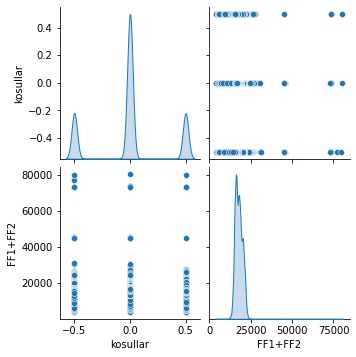

In [123]:
#Featurelerin birbiri arasındaki ilişkileri görmek için scatterplot ile grafik çizimi yapıyoruz.
sns.pairplot(x1[["kosullar","FF1+FF2"]],kind="scatter",diag_kind="kde",markers="o");

In [124]:
# FF1+FF2 feature ile tirmanma feature arası korelasyon ilişkisi.
x1.corrwith(x1["FF1+FF2"])

Altitude (ft)              -0.551914
Heading (deg)               0.186950
CAS (kt)                    0.739415
Ground Speed (kt)           0.040819
Mach                        0.052683
Temp (C)                    0.321067
Mass (kg)                   0.900570
Apu Fuel (lb/hr)            0.338543
Throttle 1                  0.766945
Throttle 2                  0.767328
Course (deg)                0.204583
Wind Direction (deg)       -0.088954
Wind Speed (kt)             0.075233
Flap (deg)                  0.033607
Landing Gear                0.130067
Speed Break                -0.001349
Zero Fuel Weight (lbs)      0.285341
Fuel Onboard (kg)           0.896176
Air Pressure (mb)           0.409667
Ground Speed Dot (kt/s2)    0.181137
Altitude Dot (ft/s)         0.006399
Heading Dot (deg/s)        -0.000848
True Airspeed (m/s)         0.187300
True Airspeed Dot (m/s2)    0.087310
Gamma (rad)                 0.004268
Drag (N)                    0.895534
Thrust (N)                  0.393344
F

In [125]:
#2 feature'nin ortalama ve standart sapmasına bakıyoruz.
# FF1+FF2 feature normalizasyon yapılmalıdır.
x1[["kosullar","FF1+FF2"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
kosullar,299706.0,-0.000572,0.310726,-0.5,0.0,0.0,0.0,0.5
FF1+FF2,299706.0,17779.607909,2181.266830,4192.0,16112.0,17600.0,19312.0,80336.0


In [126]:
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
y_train=scaler.fit_transform(y_train)
x_train,y_train

(array([[ 2.95037276e-01,  2.57867265e-03, -1.94876410e-01, ...,
         -6.39940976e-01,  1.22249192e+00, -1.60795273e+00],
        [-1.15403240e+00,  1.47382572e+00,  1.75445117e+00, ...,
          2.10774027e+00,  9.70021396e-01,  3.84592099e-04],
        [ 2.95037276e-01,  3.01815360e-01, -2.55598827e-01, ...,
         -6.05594795e-01,  4.19012609e-01,  3.84592099e-04],
        ...,
        [ 6.56942428e-01, -1.23177266e+00, -6.60644947e-01, ...,
         -4.35453262e-01, -1.65391122e+00,  3.84592099e-04],
        [ 6.56580161e-01, -1.05721793e+00, -7.90370110e-01, ...,
         -1.16012205e+00, -1.38621229e+00,  3.84592099e-04],
        [ 1.02029665e+00,  7.73878446e-02, -1.21266692e+00, ...,
         -1.32015742e+00, -8.49985986e-01,  3.84592099e-04]]),
 array([[-0.49252609],
        [ 1.60120833],
        [-0.65302141],
        ...,
        [-0.65302141],
        [-1.9734602 ],
        [-1.07614544]]))

In [142]:
model= tf.keras.Sequential([
           layers.Dense(128,activation="relu",kernel_regularizer=regularizers.l2(3e-4)),layers.Dropout(.2),
           layers.Dense(64,activation="relu",kernel_regularizer=regularizers.l2(3e-4)),layers.Dropout(.2),
           layers.Dense(64,activation="relu",kernel_regularizer=regularizers.l2(3e-4)),layers.Dropout(.2),
           layers.Dense(1)
])

In [143]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.keras.losses.mae,
              metrics=["mae"]
              
               )

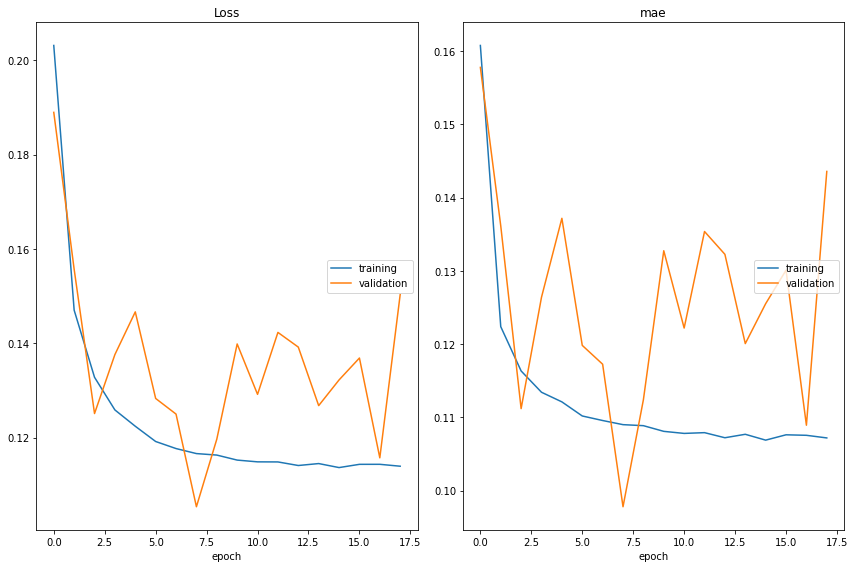

Loss
	training         	 (min:    0.114, max:    0.203, cur:    0.114)
	validation       	 (min:    0.105, max:    0.189, cur:    0.150)
mae
	training         	 (min:    0.107, max:    0.161, cur:    0.107)
	validation       	 (min:    0.098, max:    0.158, cur:    0.144)

Epoch 18: val_loss did not improve from 0.00344
1124/1124 [==============================] - 5s 5ms/step - loss: 0.1139 - mae: 0.1072 - val_loss: 0.1503 - val_mae: 0.1436 - lr: 0.0010


In [144]:
history=model.fit(x_train, y_train,
                          epochs=50,
                          validation_split=.2,
                  callbacks=[PlotLossesKerasTF(),checkpoint,early_stop,reduce_lr],batch_size=128
                          )

In [145]:
# Oluşturduğumuz modeli tr2 data seti ile test ediyoruz.
#Bunun için tr2 datasındaki feature ve hedef featureyi değişkenlere atıyoruz.
xtest_new1=x2.drop(columns="FF1+FF2")
ytest_new1=x2["FF1+FF2"].values.reshape(-1,1)
# StandardScaler komutu ile normalizasyon işlemini gerçekleştiriyoruz.
ytest_new1=scaler.fit_transform(ytest_new1)
xtest_new1=scaler.fit_transform(xtest_new1)
#Evaluate komutuyla modelimizi tr2 data setinde test ediyoruz.
model.evaluate(xtest_new1,ytest_new1)

10255/10255 [==============================] - 16s 2ms/step - loss: 0.2027 - mae: 0.1960


[0.2027451992034912, 0.1959976702928543]

In [147]:
#Modelimizin ilk 3 tahminini alıp gerçek değerler ile karşılaştırıyoruz.
x_new1=xtest_new1[:3]
y_pred1=model.predict(x_new1)
print("Tahminler:\n",y_pred1)
print("Gerçek değerler:\n",ytest_new1[:3])

Tahminler:
 [[15.876562]
 [15.953661]
 [15.995323]]
Gerçek değerler:
 [[23.29631925]
 [23.30425089]
 [23.27252431]]
